## Objective 
Detecting wheter the E-Mail is Spam or not.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# ignoring the feature warnings
import warnings
warnings.filterwarnings('ignore')

## Dataset

In [8]:
data = pd.read_csv('dataset/dataset.csv')

### Analyzing the dataset

In [9]:
data.head()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_%3B,char_freq_%28,char_freq_%5B,char_freq_%21,char_freq_%24,char_freq_%23,capital_run_length_average,capital_run_length_longest,capital_run_length_total,class
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1


In [10]:
data.shape

(4601, 58)

In [11]:
data.describe()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_%3B,char_freq_%28,char_freq_%5B,char_freq_%21,char_freq_%24,char_freq_%23,capital_run_length_average,capital_run_length_longest,capital_run_length_total,class
count,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,...,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000
mean,0.104553,0.213015,0.280656,0.065425,0.312223,0.095901,0.114208,0.105295,0.090067,0.239413,...,0.038575,0.139030,0.016976,0.269071,0.075811,0.044238,5.191515,52.172789,283.289285,0.394045
std,0.305358,1.290575,0.504143,1.395151,0.672513,0.273824,0.391441,0.401071,0.278616,0.644755,...,0.243471,0.270355,0.109394,0.815672,0.245882,0.429342,31.729449,194.891310,606.347851,0.488698
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.588000,6.000000,35.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.065000,0.000000,0.000000,0.000000,0.000000,2.276000,15.000000,95.000000,0.000000
75%,0.000000,0.000000,0.420000,0.000000,0.380000,0.000000,0.000000,0.000000,0.000000,0.160000,...,0.000000,0.188000,0.000000,0.315000,0.052000,0.000000,3.706000,43.000000,266.000000,1.000000
max,4.540000,14.280000,5.100000,42.810000,10.000000,5.880000,7.270000,11.110000,5.260000,18.180000,...,4.385000,9.752000,4.081000,32.478000,6.003000,19.829000,1102.500000,9989.000000,15841.000000,1.000000


In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4601 entries, 0 to 4600
Data columns (total 58 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   word_freq_make              4601 non-null   float64
 1   word_freq_address           4601 non-null   float64
 2   word_freq_all               4601 non-null   float64
 3   word_freq_3d                4601 non-null   float64
 4   word_freq_our               4601 non-null   float64
 5   word_freq_over              4601 non-null   float64
 6   word_freq_remove            4601 non-null   float64
 7   word_freq_internet          4601 non-null   float64
 8   word_freq_order             4601 non-null   float64
 9   word_freq_mail              4601 non-null   float64
 10  word_freq_receive           4601 non-null   float64
 11  word_freq_will              4601 non-null   float64
 12  word_freq_people            4601 non-null   float64
 13  word_freq_report            4601 

In [13]:
data['class'].unique()

array([1, 0])

In [14]:
spam = data['class'].value_counts()[1] / data['class'].value_counts().sum() *  100
not_spam = data['class'].value_counts()[0] / data['class'].value_counts().sum() *  100

print(f'Spam : {round(spam, 2)}% \nNot_Spam : {round(not_spam, 2)}% \nTotal : {round(spam + not_spam, 2)}%')

Spam : 39.4% 
Not_Spam : 60.6% 
Total : 100.0%


## Exploratory Data Analyis

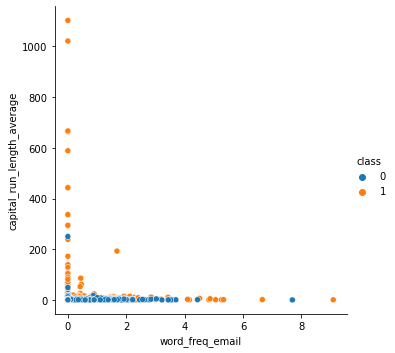

In [15]:
sns.relplot(x='word_freq_email', y='capital_run_length_average', data=data, hue='class')

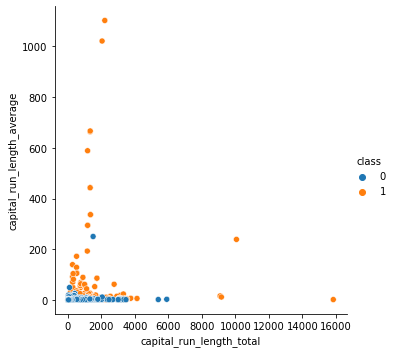

In [16]:
sns.relplot(x='capital_run_length_total', y='capital_run_length_average', data=data, hue='class')

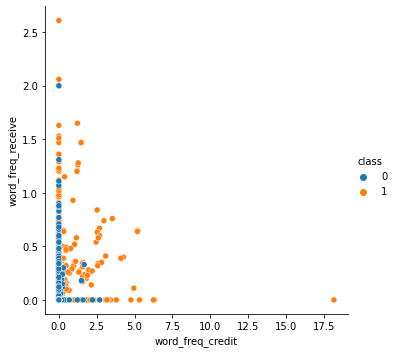

In [17]:
sns.relplot(x='word_freq_credit', y='word_freq_receive', data=data, 
            hue='class')

#### Not much insights from dataset :(

### Scaling and Splitting the dataset into Train-Test sets

In [18]:
from sklearn.preprocessing import StandardScaler

scale = StandardScaler()

X = data.drop('class', axis=1)
y = data['class']

x = scale.fit_transform(X)

In [19]:
## Scaled Dataset 

x

array([[-3.42433707e-01,  3.30884903e-01,  7.12858774e-01, ...,
        -4.52472762e-02,  4.52979198e-02, -8.72413388e-03],
       [ 3.45359395e-01,  5.19091945e-02,  4.35129540e-01, ...,
        -2.44326749e-03,  2.50562832e-01,  1.22832407e+00],
       [-1.45921392e-01, -1.65071912e-01,  8.51723390e-01, ...,
         1.45920848e-01,  2.22110599e+00,  3.25873251e+00],
       ...,
       [ 6.40127868e-01, -1.65071912e-01,  3.83734930e-02, ...,
        -1.19382054e-01, -2.36941335e-01, -2.72627750e-01],
       [ 2.80176333e+00, -1.65071912e-01, -5.56760578e-01, ...,
        -1.27482666e-01, -2.42072958e-01, -3.38603654e-01],
       [-3.42433707e-01, -1.65071912e-01,  7.32696576e-01, ...,
        -1.24236117e-01, -2.42072958e-01, -4.01280763e-01]])

In [20]:
## Split

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25
                                                    , random_state=42) 

## Creating a classifier using Support Vector Machines (SVM)

In [21]:
# SVM classifier
from sklearn.svm import SVC

In [22]:
## Creating A model

model = SVC()

## Training the model
model.fit(x_train, y_train)

SVC()

In [23]:
## Making Predictions
y_pred = model.predict(x_test)

y_pred

array([0, 0, 0, ..., 1, 0, 0])

## Evaluating the model

<AxesSubplot:xlabel='class', ylabel='Density'>

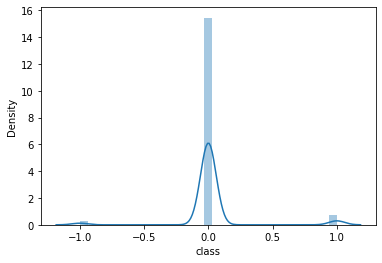

In [24]:
sns.distplot(y_test-y_pred)

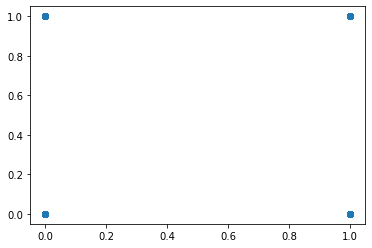

In [25]:
plt.scatter(y_test, y_pred)

In [26]:
from sklearn.metrics import  confusion_matrix,classification_report,precision_recall_curve

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.97      0.95       676
           1       0.95      0.89      0.92       475

    accuracy                           0.94      1151
   macro avg       0.94      0.93      0.93      1151
weighted avg       0.94      0.94      0.94      1151



In [27]:
cm = confusion_matrix(y_test, y_pred)
true_positive = cm[0, 0]
true_negetive = cm[1, 1]

print ('True Positive  >', cm[0, 0])
print ('False Positive >', cm[0, 1])
print ('False Negetive >', cm[1, 0])
print ('True Negetive  >', cm[1, 1])

True Positive  > 655
False Positive > 21
False Negetive > 52
True Negetive  > 423


### We have tested many classification algorithms but, SVC performed better than all the other classifiers.

In [28]:
## Dumping the model
import pickle

with open("spam_classifier_model.pkl", "wb") as f:
    pickle.dump(model, f)